# Logistic Regression
We now move on to a situation where instead of our label being a *real-valued* continuous number such as we had with the housing dataset,  our labels take on discrete single values.   We will start with the case where we have a single label y which takes on two values: 0 or 1.    We will typically use the following:
* y=0 will correspond to the negative class, also sometimes called background
* y=1 will correspond to the positive class, also sometimes called signal.
These labels of negative/positive or background/signal are of course arbitrary.  The choice of y=0 and y=1 for the two labels is *not*.

Let's look at an example.  Earlier, we examined the pulsar dataset, which has 8 features and 1 class label.   We will make this problem simpler, and just focus on one feature: **Profile_skewness**.   If we plot the class label versus this feature we see the figure below.

In [5]:
import pandas as pd
import chart_studio.plotly as py
import numpy as np
from plotly.offline import iplot
import plotly.graph_objs as go
#
# Read in all of the other digits
#fname = '/fs/scratch/PAS1585/HTRU2/HTRU_2a.csv'
fname = '/home/wayne/main/git/data/HTRU2/HTRU_2a.csv'
dfAll = pd.read_csv(fname)
dfAll.head()
#corr = dfAll.corr()
#corr.style.background_gradient().set_precision(3)

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)
  
enable_plotly_in_cell()

trace = go.Scatter(
    x=dfAll['Profile_skewness'],
    y=dfAll['class'],
    mode='markers',
    name="fitted data"
)

data = [trace]
layout = dict(
    title='Comparing Pulsar Classes',
    xaxis=dict(title='Profile skewness'),
    yaxis=dict(title='Class')
    )
iplot(dict(data=data,layout=layout))#,validate=False)


# Logistic Regression and the definition of our hypothesis function
Now we could use Linear Regression to fit this **y versus x** plot.   We would define our hypothesis or prediction function as before: $h_\theta(X)=X\theta$.  In this case we have a single feature, so we would have two $\theta$ parameters: a slope and an intercept.   But notice that if we were to draw a straight line through the above data points, we would have predictions $h_\theta(X)$ which would lie below y=0 as well as above y=1, whereas our data only has values at y=0 and at y=1.   

By using **logistic regression** instead, we will have:  $0\le h_\theta(X) \le 1$.

To obtain this result, we will need to modify our previous hypothesis function.  Instead of $h(\theta)=X\theta$, we will use:
$$h_\theta(X)=g(X\theta)$$
where
$$g(z)= {1\over{1+e^{-z}}}$$
This function is called the **sigmoid** or the **logistic** function.  Below we plot this function for various values of z from -15.0 to 15.0.

Try extending the range to +/-50, or shortenting it to +/-1.


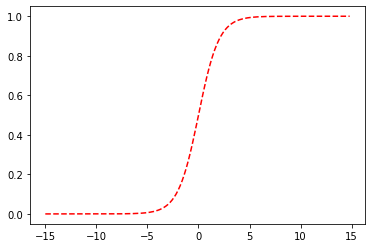

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# evenly sampled time at 200ms intervals
z = np.arange(-15.0, 15.0, 0.2)

# red dashes, blue squares and green triangles
plt.plot(z, 1.0/(1.0+np.exp(-z)), 'r--')
plt.show()


# The Interpretation of $h(\theta)$
Notice in the plot above we have the desired feature that our function tends to take on values of either 0 (when z is small) or 1 (when z is large).  If we go back to our definition of $h_\theta(X)$:
$$h_\theta(X)=g(X\theta)= {1\over{1+e^{-X\theta}}}$$
and remembering that $h_\theta(X)$ is our prediction of the **class y**, we see that our goal of logistic regression is to choose the parameters $\theta$ so that our predictions $h_\theta(X)$  are as close to our **sample classes y** as possible.

Now since  $0\le g(z) \le 1$, this also means that  $0\le h_\theta(X)\le 1$.   The class labels y can only take on the values 0 and 1, while  $h_\theta(X)$ can be any number between 0 and 1.   How do we interpret  $h_\theta(X)$?
* We will say that for a given set of features for one sample,  $h_\theta(X)$ is the probability that y=1 for that specific set of features.   So if  $h_\theta(X)=0.9$ for some X, we will say that there is a 90% chance that y=1 for that X.  If instead  $h_\theta(X)=0.05$ for some X, we will say that there is a 5% chance that y=1 for that X.
* Formally, this means that  $h_\theta(X)= P(y=1|x;\theta)$
* Since we have only two classes, we can also say that: $P(y=0|x;\theta) = 1-P(y=1|x;\theta)$


# The Decision Boundary
The decision boundary is a way of drawing a line (or surface) between our feautures X that neatly separates what our model calls signal (y=1) and what it calls background (y=0).   The way we can draw this boundary is by noting that our model predicts probabilities, not classes.   But, we can easily convert these by deciding for instance:
* if $h_\theta(X)\ge 0.5$ then our predicted class $y_{pred}=1$
* if $h_\theta(X)\lt 0.5$ then our predicted class $y_{pred}=0$

Our boundary between these two classes is then $h_\theta(X)=0.5$.   Now, since:
$$h_\theta(X)=g(X\theta)$$
and we want
$$g(z)=0.5$$ then when $$z=0$$
this tells us that the decision boundary, which best separates those paramaters X corresponding to $y_{pred}=1$ from those paramaters X corresponding to $y_{pred}=0$, can be found by setting $\theta X=0$.

We will use this fact in our example dataset below.

# The Cost Function for Logistic Regression
In the case of linear regression, we defined the cost function to be (using matrix notation):
 $$J(\theta) = {1\over{2m}}\sum_{i=i}^m(h_\theta(X^{(i)})  -y^{(i)})^2$$
 
We are going to rewrite this as:
 $$J(\theta) = {1\over{m}}\sum_{i=i}^m {1\over{2}}Cost(h_\theta(X^{(i)}),y^{(i)})$$

where for linear regression, the Cost is:
$$Cost(h_\theta(X^{(i)}),y^{(i)}) = {1\over{2}}(h_\theta(X^{(i)})  -y^{(i)})^2$$

How will we write the Cost function for logistic regression?   It turns out that we **can't** simply plug in the expression for $h_\theta(X)$ that we derived above.  The formal reason is that the resulting function is **non-convex** and thus hard to minimize.  Instead, we will use the following expression for our Cost:

$$Cost(h_\theta(X^{(i)}),y^{(i)}) = -y\log(h_\theta(X)) - (1-y)\log(1-h_\theta(X))$$

Note the following about this Cost:
* If y=1, then Cost=-$\log(h_\theta(X))$
* If y=0, then Cost=-$\log(1-h_\theta(X))$

Remember that $h_\theta(X)$ ranges from 0 to 1.   Given this, lets plot the cost for these two cases:


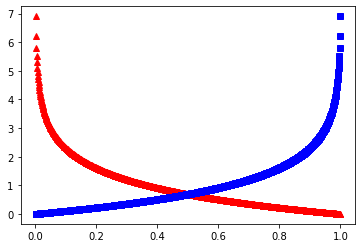

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# evenly sampled time at 200ms intervals
z = np.arange(0.001,0.9999,0.001)

# red dashes, blue squares and green triangles
plt.plot(z, -np.log(z), 'r^',z, -np.log(1-z), 'bs')
plt.show()


Let's make sure we understand these two curves:
* First, the x-axis is $h_\theta(X)$, and it ranges from 0 to 1.
* If y=1, we want our prediction $h_\theta(X)$ to be close to 1.  In this case our Cost=-$\log(h_\theta(X))$, which corresponds to the red triangles in the plot above.  As $h_\theta(X)$ gets closer to 1 (the correct class), the cost becomes small, and as $h_\theta(X)$ gets closer to 0 (the incorrect class), the cost becomes becomes infinite.
* If y=0, we want our prediciton $h_\theta(X)$  to be close to 0.  In this case our Cost=-$\log(1-h_\theta(X))$, which corresponds to the blue squares in the plot above.  As $h_\theta(X)$ gets closer to 0 (the correct class), the cost becomes small, and as $h_\theta(X)$ gets closer to 1 (the incorrect class), the cost becomes becomes infinite.



## Implementing the sigmoid
The sigmoid equation is:
$$g(z) = {1 \over{1+e^{-z}}}$$

We need to remember that for our case, $z=X\theta$.   $X$ is an "m by (n+1)" matrix, while $\theta$ is an "(n+1) by 1" matrix.   This means that z is an "m by 1" matrix, and so g(z) will also be an "m by 1" matrix.   So to implement g(z), we will need to use the numpy $exp$ function.   We implement this in the function below.

We also implement a function to retrieve the probability for a sample, given the feature vector X for that sample, as well as the fitted $\theta$ values.


In [9]:
import numpy as np
def sigmoid(z):
  sm = 1.0 / (1.0 + np.exp(z))
  return sm

def get_prob(Theta,Xp):
  hTheta = sigmoid(-np.dot(Xp,Theta))
  return hTheta.item(0)


In [10]:

Theta = np.array([1,2,3]).reshape(3,1)
X = np.array([[1,1,1],[2,2,2]])
print("Theta.shape",Theta.shape)
print("X.shape",X.shape)
z = -np.dot(X,Theta)
print(z.shape,z)
res = sigmoid(z)
print(res.shape,res)

Theta.shape (3, 1)
X.shape (2, 3)
(2, 1) [[ -6]
 [-12]]
(2, 1) [[0.99752738]
 [0.99999386]]


# Implementing the Cost Function for Logistic Regression
Our full cost function for logisitc regression looks like this:
$$J(\theta) = \sum_{i=i}^m [-y\log(h_\theta(X)) - (1-y)\log(1-h_\theta(X))]$$

Our goal is to find the values $\theta$ which minimize $J(\theta)$, given samples characterized by feature vectors X and classification labels y.  Note that I dropped the (1/m) term since it is a constant.   This does not affect the minimization of J.

Let's go over the terms in this function:
 1.  We have **m samples**, with **n features** per sample.
 2. $\theta$: this is a matrix of dimension "(n+1) by 1"
 2.  $X$: This is a matrix of dimension "m by (n+1)" (since we have m samples, and we prepend a column of 1's to the original *n* feature vectors).
 3. $h_\theta(X)$: This is a matrix of dimension "m by 1".
 4.  $y$: This is a matrix of dimension "m by 1".
 
Again, note that although I described each of the above as **matrices**, we will use numpy (2 dimensional) **arrays** to implement all of them.
 
 We can implement the above calculation in a single line of code (though we will use 2 for clarity):
$hTheta = sigmoid(-np.dot(X,Theta))$
$cost = np.dot(-y.T,np.log(hTheta)) - np.dot((1.0 -y).T,np.log(1.0-hTheta))$

Note that "cost" as defined above is actually a 1x1 numpy array, and to get the value of the cost we will need to extract that value.   This is done in the code listed here (using slightly different names for the variables):
 

In [11]:
def calc_cost_logistic(Theta,Xp,yp):
  hTheta = sigmoid(-np.dot(Xp,Theta))
  cost = np.dot(-yp.T,np.log(hTheta)) - np.dot((1.0 -yp).T,np.log(1.0-hTheta))
#
# Cost above is a 1x1 matrix - pull out the single value and return it
  cost = cost.item(0)
  return cost

## Implementing Gradient Descent
In order to implement gradient descent, we first need the gradient - the derivative of J with respect to our $\theta$.

Here is our cost function $J(\theta)$:
 $$J(\theta) = \sum_{i=i}^m [-y\log(h_\theta(X)) - (1-y)\log(1-h_\theta(X))]$$
 
 And here is the derivative with respect to $\theta$:
 $${\delta J\over \delta \theta_j} = \sum_{i=i}^m(h_\theta(X^{(i)})  -y^{(i)})\cdot X^{(i)}$$
 
 Notice that this is exactly the same form as for linear regression - you should verify for yourself that this is the case! Again - we can implement the above calculation in a single line of code (though we will use 3 for clarity):
  
$hTheta = sigmoid(-np.dot(X,Theta))$

$delTheta = np.dot(X.transpose(),(hTheta-y))$


Notice that we don't have to actually do the summation in the second line - that is taken care of for us when we do the dot-product.

The actual code is listed here (using slightly different names for the variables):


In [12]:

def calc_gradient_descent_logistic(Theta,Xp,yp):
  hTheta = sigmoid(-np.dot(Xp,Theta))
  delTheta = np.dot(Xp.transpose(),(hTheta-yp))
  return delTheta


## Iterating until we converge
The basic algorithm then to implement gradient descent looks like this:
1. Initialize each of the $\theta$ parameters to some reasonable value (0 is common, or a random number).
2. Choose a learning rate $\alpha$, maxmimum allowed iterations, and a precision for the cost decrease to reach.
3. Have an outer loop that checks that we have not exceeded our maximum number of allowed iterations **AND** that the cost is still decreasing.
4. Calculate the gradient and update our parameters like so:
$$\theta_j := \theta_j - \alpha {\partial J\over \partial \theta_j}(\theta)$$
5. Calculate the cost for this iteration and compare it to the cost of the previous iteration.
6. If the change in cost is small enough (below our chosen precision), declare victory and jump out of the loop.

It is helpful to keep track of the cost for each iteration, so you can plot it and inspect its behavior.   And of course you need to keep track of the last value of the $\theta$ parameters so you can return them.

An implementation of this iteration algorithm is shown below.

In [13]:

def fit_data(Xp,yp,learningRate,max_iterations,scale=True,delta=0.001):
#
# Get the initial values
  m,features = Xp.shape
#
# Set the starting theta values
  Theta = np.random.randn(features,1)
  Theta = np.zeros((features,1))
  print("Starting theta",Theta.shape)
  costList = []
#
# Calculate our initial cost
  cost = calc_cost_logistic(Theta,Xp,yp)
  cost_change = delta+0.1
  iterations = 0
#
# In the while loop, "delta" is the precision
  while (iterations<iterations_max) and (cost_change>delta):
    last_cost = cost
#
# Update the theta parameters
    Theta = Theta - learningRate*calc_gradient_descent_logistic(Theta,Xp,yp)
#
# Calculate the cost
    cost = calc_cost_logistic(Theta,Xp,yp)
    cost_change = last_cost - cost
#
# Store the cost
    costList.append(cost)
    iterations += 1
    
  return Theta,iterations,costList


## Preparing the data and running the algorithm
We are now ready to apply our algorithm on a toy classiifcation dataset.   Thiis dataset models admissions into a university based on the the score of two exams.   
* The features are 'score1' and 'score2'
* The label is ''admitted".  This is already in the form of 1 (admitted) and 0 (not admitted).

Our dataset has two features X1 and X2, and one label y.   We will need to combine X1 and X2 into a single 2D numpy array, and add a "ones" column (to the front of that array). 

However, before we add the ones column, it is **very helpful** to scale our input features.   This will **greatly** aid in converging.    We will use min-max scaling.   

Keep in mind that if you use scaling:
1.  If you want to predict labels using new (or old for that matter) features, you will have to scale those features using the **same** scaling parameters.
2.  The parameters we get from minimizing our cost function are those using the scaled features, so the $\theta$ values we get won't correspond to the model used to generate the data.  If you want **those** $\theta$ values (and you probably will), you will need to apply a transform to obtain them.   This is shown below.

The code below prepares the data, and then runs the fit.


In [15]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

#
# Get the toy test/admissions dataset
#url = "/fs/scratch/PAS1585/studentAcceptance/combined.csv"
url = "/home/wayne/main/git/data/studentAcceptance/combined.csv"
df=pd.read_csv(url)
XToFit = df[['score1','score2']].values
yToFit = df[['admitted']].values

#
# Make sure feature data is normalized
XToFit2 = scl.fit_transform(XToFit)
#XToFit2 = XToFit
#
# Prepend the "ones" column
ones = np.ones((len(XToFit2),1))
XToFit2 = np.append(ones,XToFit2,axis=1)
#
# Make sure label data has the correct shape
yToFit2 = yToFit.reshape(len(yToFit),1)
#
# Check shapes
print(XToFit2.shape)
print(yToFit2.shape)

iterations_max = 10000
learningRate = 0.001
delta = 0.001
Theta,iterations,costList = fit_data(XToFit2,yToFit2,learningRate,iterations_max,delta=delta)
#Theta,costList = fit_data_minimize(XToFit,yToFit,learningRate,iterations)
print("fit Theta ",Theta)
print("iterations ",iterations)
print("cost",costList[-1])


countTrue = 0
foundTrue = 0
m,features = XToFit2.shape
#
# Loop over our dataset again, and test each sample
for Xtest,yTest in zip(XToFit2,yToFit2):
#
# Make sure the features and label from this sample have the correct shape
  Xtest = Xtest.reshape(1,features)
  yTest = yTest.reshape(1,1)
#
# Get the probability for this sample
  thisProb = get_prob(Theta,Xtest)
#
# Keep track of correct classifications
  if yTest.item(0)==1:
    countTrue += 1
  if thisProb>0.5:
    foundTrue += 1
    
print("Total size ",len(yToFit),"; actual true:",countTrue,"; found true: ",foundTrue)

print("theta ",Theta)
#print("cost ",costList[:-10])


(80, 3)
(80, 1)
Starting theta (3, 1)
fit Theta  [[-4.46574814]
 [ 4.16323684]
 [ 4.28068215]]
iterations  3343
cost 34.4666455217793
Total size  80 ; actual true: 40 ; found true:  41
theta  [[-4.46574814]
 [ 4.16323684]
 [ 4.28068215]]


# Plot of the decision boundary
The next two snippits allow you to plot the decision boundary.   The first does this in the scaled feature space.   The second plots the decision boundary in the unscaled (original) feature space.

In [16]:
import matplotlib.pyplot as plt 

def plot_reg(X, y, beta): 
  y = y.reshape(len(y))
  x_0 = X[np.where(y < 0.5)] 
  x_1 = X[np.where(y > 0.5)] 
  print("x_0",x_0.shape,x_1.shape)
  x1_max = np.amax(x_1)
  x1_min = np.amin(x_1)
  print("x1 max,min",x1_max,x1_min)
	
	# plotting points with diff color for diff label 
  plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
  plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
	
	# plotting decision boundary 
  x1 = np.arange(x1_min, x1_max, 0.1) 
  #x1 = np.arange(0, 1, 0.1) 
  x2 = -(beta[0,0] + beta[1,0]*x1)/beta[2,0] 
  # uncvomment these if you have 3 features
  #x3 = np.arange(0, 1, 0.1) 
  #x2 = -(beta[0,0] + beta[1,0]*x1 + beta[3,0]*x3)/beta[2,0] 
  print("x1",x1.shape,x2.shape)
  plt.plot(x1, x2, c='k', label='reg line') 

  plt.xlabel('x1') 
  plt.ylabel('x2') 
  plt.legend() 
  plt.show() 

In [17]:
	
def plot_reg_scale(X, y, beta, scl): 
  Xt = scl.inverse_transform(X[:,1:])
  y = y.reshape(len(y))
  x_0 = Xt[np.where(y < 0.5)] 
  x_1 = Xt[np.where(y > 0.5)] 
#
# Inverse transform the points
#  x_0 = scl.inverse_transform(x_0[:,1:])
#  x_1 = scl.inverse_transform(x_1[:,1:])
	
	# plotting points with diff color for diff label 

  plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='b', label='y = 0') 
  plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1') 
	
	# plotting decision boundary 
  x1 = np.linspace(0.0,1.0, 10) 
  x2 = -(beta[0,0] + beta[1,0]*x1)/beta[2,0] 
  #
  # Uncomment if you have 3 features
  #x3 = np.linspace(0.0,1.0, 10) 
  #x2 = -(beta[0,0] + beta[1,0]*x1 + beta[3,0]*x3)/beta[2,0] 
  print("x1",x1.shape,x2.shape)
  xline = np.append(x1.reshape(len(x1),1),x2.reshape(len(x2),1),axis=1)
  # Uncomment if you have 3 features
  #xline = np.append(xline,x2.reshape(len(x3),1),axis=1)
  xline = scl.inverse_transform(xline)

  plt.plot(xline[:,0], xline[:,1], c='k', label='reg line') 

  plt.xlabel('x1') 
  plt.ylabel('x2') 
  plt.legend() 
  plt.show() 
	

(80, 3)
x_0 (40, 3) (40, 3)
x1 max,min 1.0 0.06818181818181812
x1 (10,) (10,)


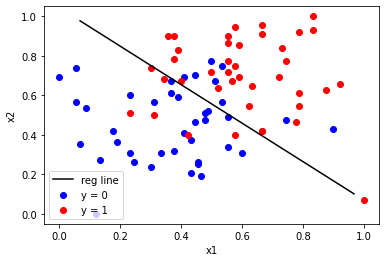

x1 (10,) (10,)


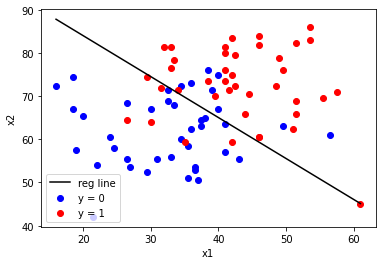

In [18]:

print(XToFit2.shape)
plot_reg(XToFit2, yToFit2, Theta)

plot_reg_scale(XToFit2, yToFit2, Theta,scl)


# Plot of the cost vs iteration

In [19]:
enable_plotly_in_cell()
data = go.Scatter(
    x=np.array(range(0,len(costList))),
    y=costList,
    mode='markers',
    name="fitted data"
)


iplot(dict(data=[data]))

# Using a Different Minimization Technique
In the work that we did above, we minimized our cost by 
1.  computing the gradient of our cost function
2.  picking a learning rate $\alpha$ and maximum number of iterations
3.  looping until we found that the change in our cost fell below some threshold or we exceeded the number of iterations

This technique worked well.   However, we are not given much guidance in how to choose the learning rate, and in fact if you use the logistic regression technique on a range of different problems, you will find that you will need to adjust $\alpha$ in order to make sure that the cost is indeed minimized.  

There is another way to minimize our cost function, and it involves using advanced algorithms which are dedicated to doing just that.  One such package which provides these algrotihms is called **scipy**.   These packages typically require the following:
1.  A "callable" function which calculates the thing you are trying to minimize: for us this is **calc_cost_logistic**.
2.  An optional "callable" function which calculates the gradient of the thing you are trying to minimize: for us this **should be calc_gradient_descent_logistic**.   Unfortunately due to how scipy implements it minimization we need to modify our function slightly.

The minimization method we will use is **scipy.optimize.minimize**.   The calling format is one of these two:
* result = minimize(fun, x0, args=(), method='BFGS')
* result = minimize(fun, x0, args=(), method='BFGS', jac=xxx)

The terms in the above are the following:
1.  **fun**: this is the function to minimize, which in our case is **calc_cost_logistic**.   It is assumed that the "parameters" that are being modified and returned by **minimize** are the **first argument** to calc_cost_logistic.   For us this is the **Theta** array.
2. **xo**: this is the initial values of the parameters you are minimizing (again this is **theta**).
3. **args=()**:  This is an optional argument, but it will be a *tuple* of all of the other arguments to your **fun**.   For us we call **calc_cost_logistic** like this:
      *     cost = calc_cost_logistic(Theta,XToFit2,yToFit2)
so **args=(XToFit2,yToFit2)**.
4.**method**: This is the optimzation method.  Scipy includes a large number of possibilities - see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) for more info.   For now, we will use 'BFGS' (or Broyden–Fletcher–Goldfarb–Shanno) algorithm.  
5. **jac**: This supplies the gradient of the cost function with respect to the parameters.   Normally this would just be **calc_gradient_descent_logistic** but due to a slight issue with how we implemented it, this willl not work without a minor modification.   This is described below suing the function **calc_gradient_descent_logistic_new**.

In [20]:
def calc_gradient_descent_logistic_new(Theta,Xp,yp):
  Theta = Theta.reshape(len(Theta),1)
  hTheta = sigmoid(-np.dot(Xp,Theta))
  delTheta = np.dot(Xp.transpose(),(hTheta-yp))
  #
  # scipy expects a returned result with dimensions (len(Theta),) instead of (len(Theta),1)
  delTheta = np.ndarray.flatten(delTheta)
  return delTheta


In [21]:
from scipy.optimize import minimize
Theta_0 = np.random.randn(features,1)
Theta_0 = np.zeros((features,1))


result = minimize(calc_cost_logistic, Theta_0, args=(XToFit2,yToFit2), method = 'BFGS')
print()
print("result",result)
print("minimized Theta",result['x'])

result = minimize(calc_cost_logistic, Theta_0, jac=calc_gradient_descent_logistic_new,args=(XToFit2,yToFit2), method = 'BFGS')
print()
print("result",result)
print("minimized Theta",result['x'])



result       fun: 32.435793994271805
 hess_inv: array([[ 2.22251281, -1.72634755, -2.19237168],
       [-1.72634755,  2.62118206,  0.7158789 ],
       [-2.19237168,  0.7158789 ,  3.17953618]])
      jac: array([ 0.00000000e+00, -2.38418579e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 14
     njev: 16
   status: 0
  success: True
        x: array([-7.33112853,  6.67532631,  6.99196623])
minimized Theta [-7.33112853  6.67532631  6.99196623]

result       fun: 32.43579399426507
 hess_inv: array([[ 2.18578079, -1.73628283, -2.10650143],
       [-1.73628283,  2.68050091,  0.66818576],
       [-2.10650143,  0.66818576,  3.06001182]])
      jac: array([-3.68992521e-07, -1.68872650e-06, -8.00612386e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 14
     njev: 16
   status: 0
  success: True
        x: array([-7.33113113,  6.6753291 ,  6.99196826])
minimized Theta [-7.33113113  6.6753291   6.99196826]


# Plot of the decision boundary
Now let's plot the decision boundary using the results of the above fit.   Notice that the fitted $\theta$ results are in the returned **result** dictionary, with key "x".  

We will have to reshape the resulting $\theta$ since our plotting routine expects an array of shape (3,1).

(3, 1)
old shape  (3,)
new shape  (3, 1)
x_0 (40, 3) (40, 3)
x1 max,min 1.0 0.06818181818181812
x1 (10,) (10,)


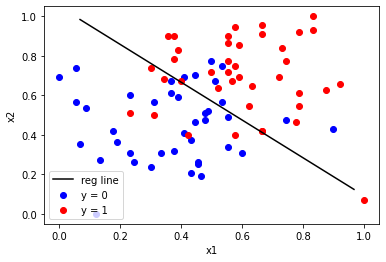

x1 (10,) (10,)


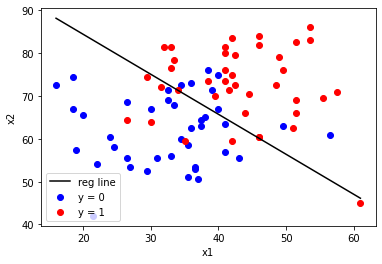

In [22]:
print(Theta.shape)
ThetaNew = result['x']
print("old shape ",ThetaNew.shape)
ThetaNew = ThetaNew.reshape(3,1)
print("new shape ",ThetaNew.shape)

plot_reg(XToFit2, yToFit2, ThetaNew)

plot_reg_scale(XToFit2, yToFit2, ThetaNew,scl)
